 # Confidence Intervals
 + [Quick Reference to my fantastic CI tutorial](https://github.com/AndresNamm/study/blob/main/statistics/confidence_intervals/CONFIDENCE%20INTERVALS.pdf)
 + [This code is based on this blog post](https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b)

 We are taking the data from Uniform distribution.

In [1]:
import numpy as np 
from scipy.stats import t,norm
import math
import matplotlib.pyplot as plt
from dataclasses import dataclass


In [2]:
@dataclass
class ConfidenceInterval:
    mean:float
    lower_bound:float
    upper_bound:float
    test_type:str 
    extremum_val:float
    def get_size(self)->float:
        return self.upper_bound-self.lower_bound
    def print_statistics(self):
        print(f"Test type: {self.test_type}")
        print(f"Median: {self.mean}")
        print(f"Min boundary {self.lower_bound}")   
        print(f"Max boundary {self.upper_bound}")
        print(f"{self.test_type} val: {self.extremum_val}")
        print(f"Width is {self.get_size()}" )

def calculate_confidence_interval(sample_mean,sample_std,sample_size,confidence,test_type)->ConfidenceInterval:
    alpha=1-confidence    
    # Only thing that is different for t and z confidence intervale is the extremum value
    if test_type == "t":
        degrees_of_freedom=sample_size-1
        extremum_val=float(np.abs(t.ppf(alpha/2,degrees_of_freedom))) # t_val - based on confidence we have chosen, how many standard distributions is the ci width. If Confidence is 95%, then std is  ~2
    elif test_type == "z":
        extremum_val=float(np.abs(norm.ppf(alpha/2))) # z_val - based on confidence we have chosen, how many standard distributions is the ci width. If Confidence is 95%, then std is ~2.  
    else:
        raise Exception("Wrong test type provided")
    
    clt_based_std = sample_std / math.sqrt(sample_size) # The std for sample means. Calculated based on CLT 
    max_expected_difference = extremum_val *  clt_based_std # std * (how many stds based on chosen confidence interval size)
    return ConfidenceInterval(mean=sample_mean,lower_bound=sample_mean-max_expected_difference,upper_bound=sample_mean+max_expected_difference,test_type=test_type,extremum_val=extremum_val)



def perform_comparison(sample_size:int, confidence:float):
    # Generate sample data from uniform distritubution on the range 0..100
    x = np.random.uniform(size=sample_size) 
    x_positive = x-min(x)
    x_scaled = x_positive/max(x_positive)*100
    x = x_scaled
    # Calculate confidence intervals based on both Normal distribution (Z val) and t distribution (t val)
    ci_z=calculate_confidence_interval(sample_mean=x.mean(),sample_std=x.std(),sample_size=sample_size,confidence=confidence,test_type='z')
    ci_t=calculate_confidence_interval(sample_mean=x.mean(),sample_std=x.std(),sample_size=sample_size,confidence=confidence,test_type='t')
    return x, ci_z, ci_t




 Lets take 1 sample with size SAMPLE_SIZE from the Uniform distribution and plot this sample

Sample size: 5, Sample std: 39.297678688090066, Confidence 0.99, Max value 100.0, Min value: 0.0
Test type: z
Median: 58.62171182309295
Min boundary 24.176410660646063
Max boundary 93.06701298553983
z val: 1.959963984540054
Width is 68.89060232489376
Test type: t
Median: 58.62171182309295
Min boundary 9.82719898311209
Max boundary 107.41622466307382
t val: 2.7764451051977987
Width is 97.58902567996174
Differences in CI size ci_t-ci_z 28.698423355067973


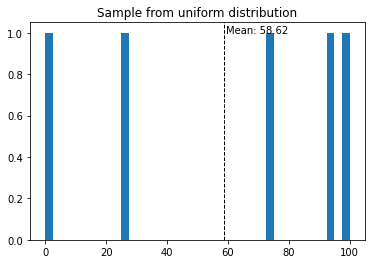

In [3]:
SAMPLE_SIZE=5
CONFIDENCE=0.99
x, ci_z, ci_t = perform_comparison(sample_size=SAMPLE_SIZE,confidence=0.95)
print(f"Sample size: {SAMPLE_SIZE}, Sample std: {x.std()}, Confidence {CONFIDENCE}, Max value {max(x)}, Min value: {min(x)}")
ci_z.print_statistics()
ci_t.print_statistics()
print(f"Differences in CI size ci_t-ci_z {ci_t.get_size()-ci_z.get_size()}")

# PLOT THE GENERATED DISTRIBUTION X

def plot_default_histogram(x,bins=40,start=0,end=100,title="Distribution over sample means from uniform distribution"):
    counts, bins = np.histogram(x,bins=bins)
    plt.hist(bins[:-1],len(bins)-1,weights=counts,range=(start,end))
    plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
    # plt.axvline(m+s, color='r', linestyle='dashed', linewidth=1)
    # plt.axvline(m-s, color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(x.mean()*1.01, max_ylim*0.95, 'Mean: {:.2f}'.format(x.mean())) 
    plt.title(title)

plot_default_histogram(x,title="Sample from uniform distribution")


 Now we perform this experiment 1000 times and see how the distribution of means will look like. E.g. we take the sample with size sample_size (set above) and we do this 1000 times.
 Then we plot the means of these 1000 samples.

 According to the Central Limit Theorem (CLT). Means of any distribution will follow a normal distribution.
 with std of $\frac{\sigma}{\sqrt{n}}$ where n is the sample size and $\sigma$ is the global std which usually is estimated by sample std.

 **PS! In reality we almost always limit our experiment with taking 1 sample only. The 1000 sample setup only aims to showcase
 how Central Limit Theorem turns any distribution (in this case Uniform) into Normal Distribution (With smaller samples t distribution) with sample mean as the global mean and std $\frac{\sigma}{\sqrt{n}}$**

 If we can say (based on CLT) that the sample means center around the global mean with std $\frac{\sigma}{\sqrt{n}}$ then based on the [characteristics of normal distribution](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/PH717-Module6-RandomError5.html)
 we can also say that that 66 % percent of the means are +/- 1 std away from the global mean. ~95 % is ~2 std away from the global mean and ~99% means is 2.5 std away from global mean.
 Thus if we have the sample mean and based on the sample size and sample std, the std for the sample means, we can now say the interval where (68%,95%,99%) of the means should be located.
 This logic can be applied to the t-distribution as well.

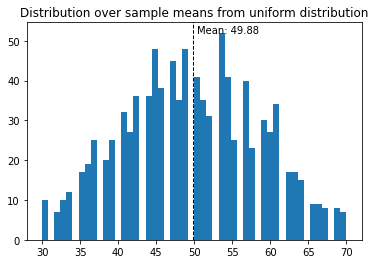

In [4]:
means = []
for i in range(1000):
    x, ci_z, ci_t = perform_comparison(sample_size=SAMPLE_SIZE,confidence=0.95)
    means.append(x.mean())

means = np.asarray(means)
plot_default_histogram(means,bins=50,start=30,end=70)

 Lets now take a few additional  samples to show how we derive the confidence interval from 1 sample.
 + The confidence interval if we assume normal distribution. Sample sizes 30 and up SAMPLE_ESTIMATE +/- $\frac{\sigma}{\sqrt{n}}*Z$
 + The confidence interval if we assume a t-distribution. Sample sizes less than 30 SAMPLE_ESTIMATE +/- $\frac{\sigma}{\sqrt{n}}*T$

 Reminder - Z-value and T-value are calculated based on the Confidence interval size we chose. (Usually 95% or 99%). Based on these percentages we find min and max values (-t/+t or -z/+z) in the
 standardized t or normal distribution x scale where 95 % or 99 % of the data belongs to.

 EXAMPLE

In [5]:

sample_size=5
print(f"T value calculation with sample size {sample_size}")
for ci in [0.95,0.99]:
    alpha=1-ci
    degrees_of_freedom=sample_size-1    
    sample_t_val=float(np.abs(t.ppf(alpha/2,degrees_of_freedom))) # t_val - based on confidence we have chosen, how many standard distributions is the ci width. If Confidence is 95%, then std is  ~2
    print(f"T value for CI {ci} is {sample_t_val}")


print(f"Z value calculation, Here the sample size is by default assumed to be bigger than 30")
for ci in [0.95,0.99]:
    alpha=1-ci

    z_val=float(np.abs(norm.ppf(alpha/2)))
    print(f"Z value for CI {ci} is {z_val}")






T value calculation with sample size 5
T value for CI 0.95 is 2.7764451051977987
T value for CI 0.99 is 4.604094871415897
Z value calculation, Here the sample size is by default assumed to be bigger than 30
Z value for CI 0.95 is 1.959963984540054
Z value for CI 0.99 is 2.5758293035489004


 **ADDITIONAL SAMPLE 1 COMPARED TO MEAN**

Sample size: 5, Sample std: 33.888800967711084, Confidence 0.99, Max value 100.0, Min value: 0.0
Test type: z
Median: 59.74431754200517
Min boundary 30.040019620692938
Max boundary 89.4486154633174
z val: 1.959963984540054
Width is 59.40859584262446
Test type: t
Median: 59.74431754200517
Min boundary 17.665813438105353
Max boundary 101.82282164590498
t val: 2.7764451051977987
Width is 84.15700820779963
t distribution has wider confidence intervals compared to z distribution
t.width-z.width 24.748412365175177 


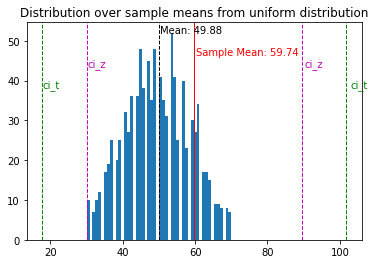

In [6]:

def take_sample_and_show(means):
    x_sample, sample_ci_z, sample_ci_t = perform_comparison(sample_size=SAMPLE_SIZE,confidence=0.95)
    plot_default_histogram(means,bins=50,start=30,end=70)

    # ADD THE SAMPLE 
    plt.axvline(x_sample.mean(), color='r', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(x_sample.mean()*1.01,max_ylim*0.85, 'Sample Mean: {:.2f}'.format(x_sample.mean()),color='r')  

    print(f"Sample size: {len(x_sample)}, Sample std: {x_sample.std()}, Confidence {CONFIDENCE}, Max value {max(x_sample)}, Min value: {min(x_sample)}")

    # PLOT CI INFOR FOR Z TESTS
    z_color='m'
    plt.axvline(sample_ci_z.upper_bound, color=z_color, linestyle='dashed', linewidth=1)
    plt.axvline(sample_ci_z.lower_bound, color=z_color, linestyle='dashed', linewidth=1)
    plt.text(sample_ci_z.upper_bound*1.01, max_ylim*0.8, 'ci_z',color=z_color) 
    plt.text(sample_ci_z.lower_bound*1.01, max_ylim*0.8, 'ci_z',color=z_color) 
    sample_ci_z.print_statistics()

    # PLOT CI INFO FOR T TESTS
    t_color='g'
    plt.axvline(sample_ci_t.upper_bound, color=t_color, linestyle='dashed', linewidth=1)
    plt.axvline(sample_ci_t.lower_bound, color=t_color, linestyle='dashed', linewidth=1)
    plt.text(sample_ci_t.upper_bound*1.01, max_ylim*0.7, 'ci_t',color=t_color) 
    plt.text(sample_ci_t.lower_bound*1.01, max_ylim*0.7, 'ci_t',color=t_color) 
    sample_ci_t.print_statistics()
    print("t distribution has wider confidence intervals compared to z distribution")
    print(f"t.width-z.width {sample_ci_t.get_size()-sample_ci_z.get_size()} ")


take_sample_and_show(means)



 **ADDITIONAL SAMPLE 2 COMPARED TO MEAN**

Sample size: 5, Sample std: 37.07359268678547, Confidence 0.99, Max value 100.0, Min value: 0.0
Test type: z
Median: 64.2243739432852
Min boundary 31.728534293162625
Max boundary 96.72021359340778
z val: 1.959963984540054
Width is 64.99167930024515
Test type: t
Median: 64.2243739432852
Min boundary 18.191428620033236
Max boundary 110.25731926653717
t val: 2.7764451051977987
Width is 92.06589064650393
t distribution has wider confidence intervals compared to z distribution
t.width-z.width 27.074211346258778 


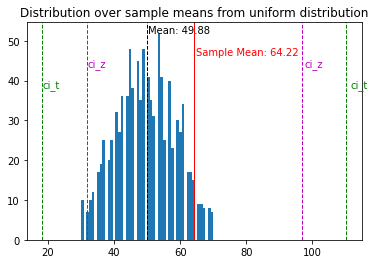

In [7]:
take_sample_and_show(means)



 **ADDITIONAL SAMPLE 3 COMPARED TO MEAN**

Sample size: 5, Sample std: 34.18060341998993, Confidence 0.99, Max value 100.0, Min value: 0.0
Test type: z
Median: 54.34878876107713
Min boundary 24.38871941294697
Max boundary 84.30885810920729
z val: 1.959963984540054
Width is 59.920138696260324
Test type: t
Median: 54.34878876107713
Min boundary 11.907964057595102
Max boundary 96.78961346455915
t val: 2.7764451051977987
Width is 84.88164940696404
t distribution has wider confidence intervals compared to z distribution
t.width-z.width 24.96151071070372 


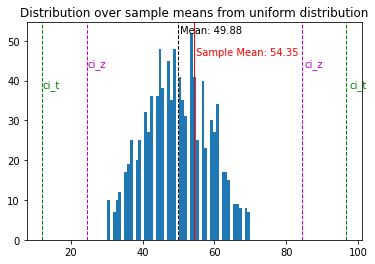

In [8]:
take_sample_and_show(means)



 # Theory - Shape Difference between t-distribution and normal distribution
 Additional note. In this experiment we are showcasing Normal Distribution based confidence intervals and T-Distribution based confidence intervals.
 Based on CLT we are assuming in general a normal distribution to the means of data, however when the sample sizes are small, it is better to assume a variant
 of normal distribution that has wider tails/proportionally less data in the middle (t-distribution).
 the t-distribution has wider tails with smaller sample sizes. With sample sizes 30 t-distribution starts to follow the normal distribution.
 The distribution assumption for the mean data is important because based on that we calculate the extremum values (t or z).
 For Normal distribution we assume the 66% of data to be within 1 std from mean, 95 % data to be wtihin ~2 std from mean, 99% of data to be within ~2.3 std from the mean.
 For t-distribution the amount of standard distributions we need for any of (66%,95%,99%) are wider based on the sample size. In t-distribution we call this "degrees of freedom"

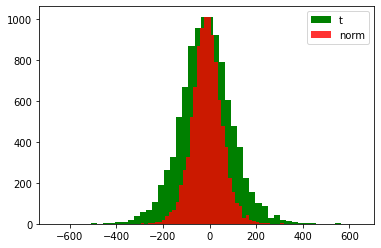

In [9]:
sample_size = 10
t_dist = np.random.standard_t(sample_size-1, 10000,)*100
n_dist = np.random.normal(0,1,10000)*100

t_counts, t_bins = np.histogram(t_dist,50)
n_counts, n_bins = np.histogram(n_dist,50)
plot1=plt.hist(t_bins[:-1],len(t_bins)-1,weights=t_counts,color="g",label="t")
plot2=plt.hist(n_bins[:-1],len(n_bins)-1,weights=t_counts,color="r",alpha=0.8,label="norm")
legend=plt.legend(('t','norm'))


 When t-distribution sample size grows however, we can see that the normal distribution
 and t-distribution difference is not so big anymore

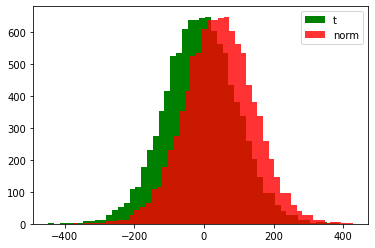

In [10]:
sample_size = 30
t_dist = np.random.standard_t(sample_size-1, 10000,)*100
n_dist = np.random.normal(0,1,10000)*100

t_counts, t_bins = np.histogram(t_dist,50)
n_counts, n_bins = np.histogram(n_dist,50)
plot1=plt.hist(t_bins[:-1],len(t_bins)-1,weights=t_counts,color="g",label="t")
plot2=plt.hist(n_bins[:-1],len(n_bins)-1,weights=t_counts,color="r",alpha=0.8,label="norm")
legend=plt.legend(('t','norm'))

 # T-TEST with T distribution
 https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_t.html

 We have a sample called "intake". From previous results we have knowledge that that the global mean is 7725.
 Based on this we form hypotheses
 + H0 - "intake" mean is not significantly different.
 + H1 - "intake" mean is significantly different.
 We set the significance standard level to 5%. Because we are looking at differences both smaller and larger, this is going to be
 a two sided t-test. E.g we will look if the mean extracted from this sample does not fall into the 95% Confidence interval of the samples(size=11) from distribution with mean 7725
 E.g on both sides only roughly 2.5 percent of values are larger/smaller than it.

In [11]:
intake = np.array([5260., 5470, 5640, 6180, 6390, 6515, 6805, 7515, \
                   7515, 8230, 8770])
assumed_global_mean = 7725

 To get "intake" means t-value compared with the "assumed_global_mean" we are standardizing it.
 The formula for this is $\frac{X - \mu}{\sigma}$. 'As we are looking at the distribution over means,
 based on CLT the $\sigma=\frac{\sigma}{\sqrt{n}}$. CLT assumes $\sigma$ to be the global
 STD but in our case we have taken the sample std as the estimate. To make it a bit larger,
 we have taken the std to be with only degrees of freedom=1. This reduces the t-value as it makes
 the element below the fraction to be larger.

In [12]:
degrees_of_freedom=sample_size-1
sample_t_val =  (np.mean(intake) - assumed_global_mean) / (intake.std(ddof=1)/np.sqrt(len(intake)))
alpha=1-0.95
test_t_val =float(np.abs(t.ppf(alpha/2,degrees_of_freedom))) # t_val - based on confidence we have chosen, how many standard distributions is the ci width. If Confidence is 95%, then std is  ~2
    


 In this case we are taking 1000000 samples from **standard** t distribution with 10 degrees of freedom. Then we are a just comparing
 our calculated t-value for the "intake" mean with all the samples and finding the fraction our t_value is smaller
 than the sample element. Basically, if our calculated t-value is very large, this should happen very few times.
 Infact less than 0.025 time

 In this chart the red lines represent the 0.95 boundaries for the test. If another value is more extreme than that, then test is significant.

Probability of having a more extreme value than sample t_val:-2.8207540608310198 is 0.018107 < 0.025


Text(-4.795281903412733, 0.38631048442836635, 'sample t_val')

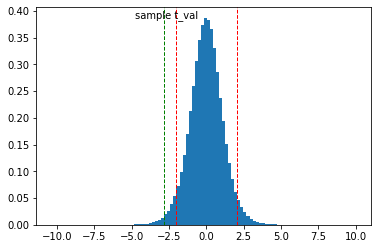

In [13]:
degrees_of_freedom=len(intake)-1
s = np.random.standard_t(df=degrees_of_freedom,size=1000000)
h = plt.hist(s, bins=100, density=True)
probability=np.sum(np.abs(sample_t_val) < np.abs(s)) / float(len(s))
print(f"Probability of having a more extreme value than sample t_val:{sample_t_val} is {probability} < 0.025")
plt.axvline(sample_t_val, color='g', linestyle='dashed', linewidth=1)
plt.axvline(test_t_val, color='r', linestyle='dashed', linewidth=1)

plt.axvline(-test_t_val, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(sample_t_val*1.7, max_ylim*0.95, 'sample t_val') 

